In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 
## Damian Baraniak 324851
##### WSI-24L-G104

Celem zadanie jest implementacja metody gradientu prostego dla dwóch funkcji:
- Funkcja Himmelblau:
    $$ f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2 $$ 
- Funckcja Ackleya w wersji dwuwymiarowej:
    $$ f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2+y^2)})-\exp(0.5(\cos2\pi x+\cos2\pi y))+20+e $$


## Opis działania metody
Metoda gradientu prostego polega na znalezieniu, w iteracyjny sposób, ekstremum lokalnego funkcji. W tym przypadku szukamy minimum dla funkcji dwóch zmiennych o postaci $z = f(x,y)$.
Gradient funkcji, $\nabla f(\mathbf{x_P})$ wskazuje kierunek w którym funckja rośnie najszybciej względem punktu $\mathbf{x_P}$, wynika więc, że w przeciwnym kierunku funckja będzie malała najszybciej. Możemy, więc przesunąć punkt $\mathbf{x_P}$  w kierunku najszybszego spadku i powtórzyć proces. Znaczenie na jeszcze długość czynionego kroku, jeśli okazałby się za duży, solver mógłby przeskoczyć za szukane ekstremum i zacząć uciekać do nieskończoności. Oczywiście krok nie powinien być za mały, ponieważ szukanie ekstremum zajęło by za długo. Wzór iteracyjny, wygląda następująco:
$$ \mathbf{x_t+1} = \mathbf{x_t} - \beta_t \nabla f(\mathbf{x_t}) $$
Oznacza to, że przed przystąpieniem do wyznaczenia ekstremum należy podać jakiś punkt początkowy $\mathbf{x_0}$, przy okazji można ograniczyć czas obliczeń podając odgórnie liczbę kroków do wykonania.

In [2]:
def gradient_descent(func,grad_func,start_pos,steps,beta):
    position = start_pos
    func_value = [(0,func(*position))]
    trace = [position]
    def calculate_new_position():
        grad_value = grad_func(position[0],position[1])
        e1 = position[0]-beta*grad_value[0]
        e2 = position[1]-beta*grad_value[1]
        return (e1,e2)
    for i in range(1,steps+1):
        position=calculate_new_position()
        func_value.append((i,func(*position)))
        trace.append(position)
    return trace,func_value

def plot_function(func, trace=[]):
    X = np.arange(-4.5, 4.5, 0.1)
    Y = np.arange(-4.5,4.5, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = func(X,Y)
    plt.contourf(X,Y,Z,90,cmap="jet")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.title(func.__name__.replace("_"," "))
    if len(trace):
        trace_x,trace_y = list(zip(*trace))
        plt.plot(trace_x,trace_y,color="red")
    plt.show()

def print_values(trace,values):
    trace_x,trace_y = list(zip(*trace))
    steps,value = list(zip(*values))
    for i in range(len(steps)):
        print(f"Step {steps[i]:<3}\t Current position ({trace_x[i]:.4e}\t {trace_y[i]:.4e})\t value at position {value[i]:<.4e}.")

def plot_values(values):
    steps,value = list(zip(*values))
    plt.plot(steps,value)
    plt.xlabel("step")
    plt.ylabel("function value")
    plt.grid()
    plt.show()     



## Funkcja Himmelblau
Funkcja ta ma postać:
$$ f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2 $$ 
oraz jej gradient:
$$\nabla f(x,y)=
\begin{bmatrix}
2 (2 x (x^2 + y - 11) + x + y^2 - 7)
\\2 (x^2 + 2 y (x + y^2 - 7) + y - 11)
\end{bmatrix}$$
Z analizy funkcji wynika, że posiada ona cztery minima lokalne, wsystkie o wartości 0.
Gradienty funkcji w punktach potrafiły osiągać ogromne wartości, szczególnie bliżej granicy sprawdzanego obszaru: $\left[ -4.5, 4.5 \right ] \times \left[ -4.5, 4.5 \right ]$. Z tego powodu parametry $\beta_t$ należało dobierać z rozwagą, najczęściej mniejsze od $0.05$ inaczej dochodziło do rozbierzności i błędów.

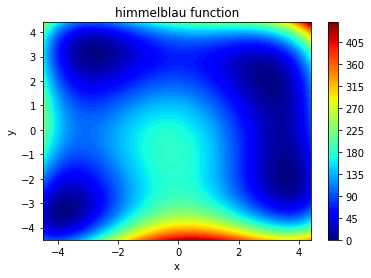

In [3]:
def himmelblau_function(x,y):
    elem1 = (x**2 + y - 11)**2 
    elem2 = (x + y**2 - 7)**2
    return elem1+elem2

def himmelblau_funnction_gradient(x,y):
    dx = 2*(2*x*(x**2+y-11)+x+y**2-7)
    dy = 2*(x**2+2*y*(x+y**2-7)+y-11)
    return (dx,dy)

plot_function(himmelblau_function)

### Eksperymenty sprwadzające działanie solvera dal różnych punktów początkowych oraz długości kroku

#### Punkt $(0,0)$

##### $\beta_t = 0.001$

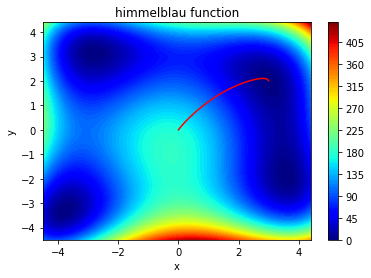

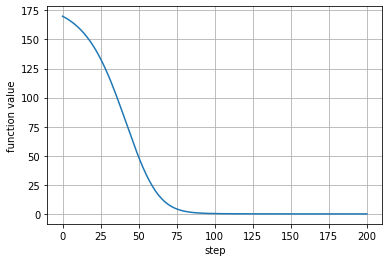

Step 196	 Current position (2.9963e+00	 2.0087e+00)	 value at position 1.1460e-03.
Step 197	 Current position (2.9964e+00	 2.0085e+00)	 value at position 1.0874e-03.
Step 198	 Current position (2.9965e+00	 2.0082e+00)	 value at position 1.0317e-03.
Step 199	 Current position (2.9966e+00	 2.0080e+00)	 value at position 9.7898e-04.
Step 200	 Current position (2.9967e+00	 2.0078e+00)	 value at position 9.2893e-04.


In [4]:
beta = 0.001
start_position = (0,0)
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.02$

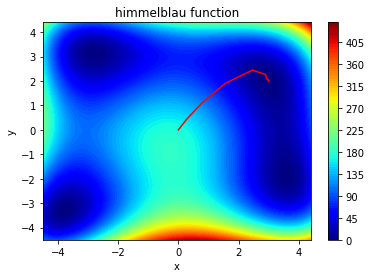

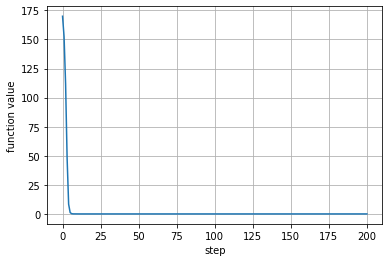

Step 196	 Current position (3.0000e+00	 2.0000e+00)	 value at position 0.0000e+00.
Step 197	 Current position (3.0000e+00	 2.0000e+00)	 value at position 0.0000e+00.
Step 198	 Current position (3.0000e+00	 2.0000e+00)	 value at position 0.0000e+00.
Step 199	 Current position (3.0000e+00	 2.0000e+00)	 value at position 0.0000e+00.
Step 200	 Current position (3.0000e+00	 2.0000e+00)	 value at position 0.0000e+00.


In [5]:
beta = 0.02
start_position = (0,0)
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.03$

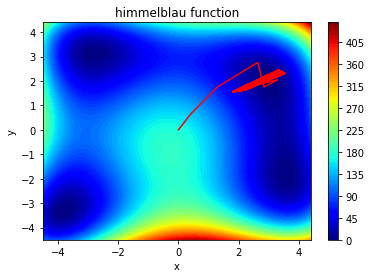

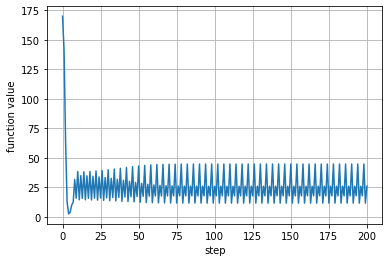

Step 196	 Current position (2.1881e+00	 1.6205e+00)	 value at position 2.5859e+01.
Step 197	 Current position (3.5249e+00	 2.3211e+00)	 value at position 1.7690e+01.
Step 198	 Current position (1.8256e+00	 1.5637e+00)	 value at position 4.4701e+01.
Step 199	 Current position (3.3265e+00	 2.4420e+00)	 value at position 1.1531e+01.
Step 200	 Current position (2.1881e+00	 1.6205e+00)	 value at position 2.5859e+01.


In [6]:
beta = 0.03
start_position = (0,0)
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

#### Punkt $(-3.2,0)$

##### $\beta_t = 0.001$

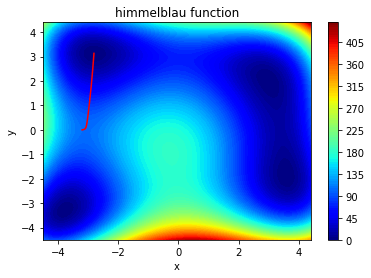

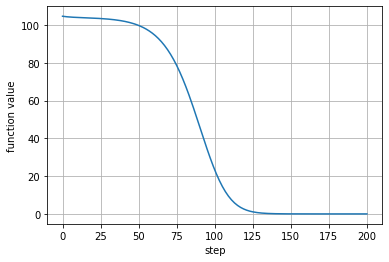

Step 196	 Current position (-2.8051e+00	 3.1308e+00)	 value at position 9.2095e-06.
Step 197	 Current position (-2.8051e+00	 3.1309e+00)	 value at position 7.7880e-06.
Step 198	 Current position (-2.8051e+00	 3.1309e+00)	 value at position 6.5860e-06.
Step 199	 Current position (-2.8051e+00	 3.1309e+00)	 value at position 5.5695e-06.
Step 200	 Current position (-2.8051e+00	 3.1310e+00)	 value at position 4.7099e-06.


In [7]:
start_position = (-3.2,0)
beta = 0.001
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.02$

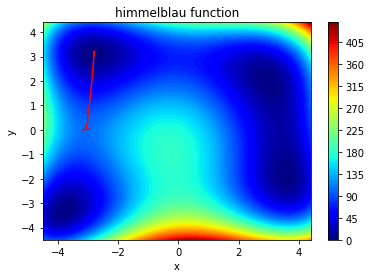

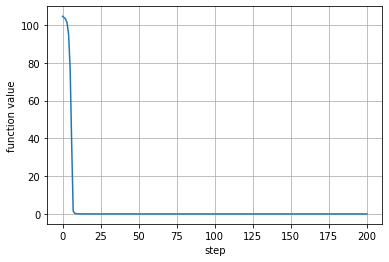

Step 196	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 197	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 198	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 199	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 200	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.


In [8]:
start_position = (-3.2,0)
beta = 0.02
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.03$

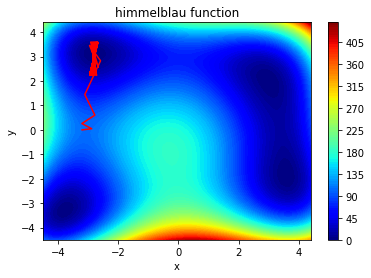

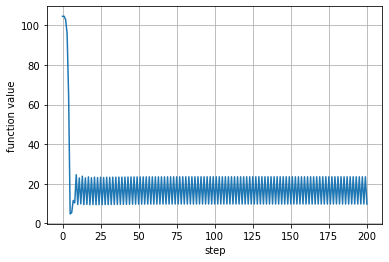

Step 196	 Current position (-2.6772e+00	 3.5753e+00)	 value at position 9.7112e+00.
Step 197	 Current position (-2.9462e+00	 2.2583e+00)	 value at position 2.3490e+01.
Step 198	 Current position (-2.6772e+00	 3.5753e+00)	 value at position 9.7112e+00.
Step 199	 Current position (-2.9462e+00	 2.2583e+00)	 value at position 2.3490e+01.
Step 200	 Current position (-2.6772e+00	 3.5753e+00)	 value at position 9.7112e+00.


In [9]:
start_position = (-3.2,0)
beta = 0.03
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

#### Punkt $(0,-4)$

##### $\beta_t = 0.001$

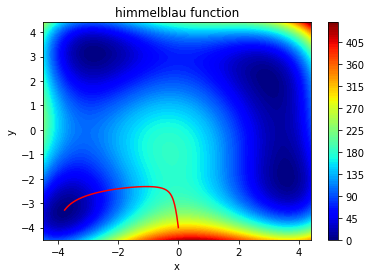

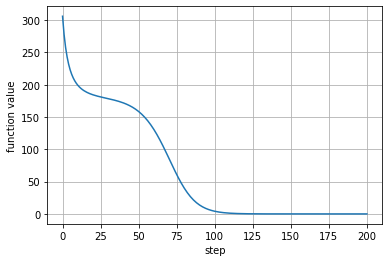

Step 196	 Current position (-3.7791e+00	 -3.2829e+00)	 value at position 4.4881e-06.
Step 197	 Current position (-3.7791e+00	 -3.2829e+00)	 value at position 3.8759e-06.
Step 198	 Current position (-3.7791e+00	 -3.2829e+00)	 value at position 3.3472e-06.
Step 199	 Current position (-3.7792e+00	 -3.2829e+00)	 value at position 2.8906e-06.
Step 200	 Current position (-3.7792e+00	 -3.2830e+00)	 value at position 2.4963e-06.


In [10]:
start_position = (0,-4)
beta = 0.001
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.01$

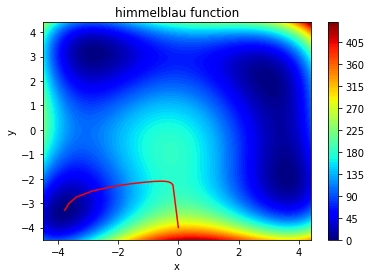

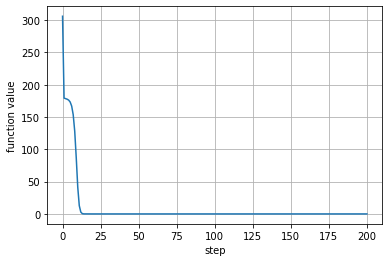

Step 196	 Current position (-3.7793e+00	 -3.2832e+00)	 value at position 7.8886e-31.
Step 197	 Current position (-3.7793e+00	 -3.2832e+00)	 value at position 7.8886e-31.
Step 198	 Current position (-3.7793e+00	 -3.2832e+00)	 value at position 7.8886e-31.
Step 199	 Current position (-3.7793e+00	 -3.2832e+00)	 value at position 7.8886e-31.
Step 200	 Current position (-3.7793e+00	 -3.2832e+00)	 value at position 7.8886e-31.


In [11]:
start_position = (0,-4)
beta = 0.01
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.02$

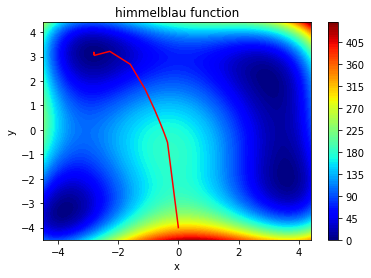

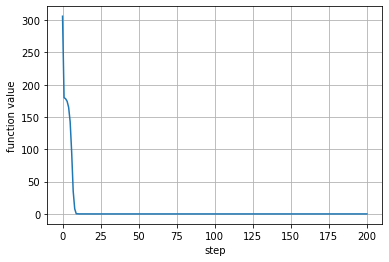

Step 196	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 197	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 198	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 199	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.
Step 200	 Current position (-2.8051e+00	 3.1313e+00)	 value at position 7.0997e-30.


In [12]:
start_position = (0,-4)
beta = 0.02
trace,values = gradient_descent(himmelblau_function,himmelblau_funnction_gradient,start_position,200,beta)

plot_function(himmelblau_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

### Wnioski
Dla punktów początkowych $(0,0)$ i $(-3,2)$, zastosowano takie same wartości parametru $\beta_t$, wyniki okazały się zbliżone. Dla wartości niepotrzebnie małej $\beta_t 0.001$ krzywa na wykresie wydawała się gładka i solver potrzebował około $100$ kroków by zbliżyć się do minimów funkcji. O wiele lepsze wyniki dawała $\beta_t=0.02$ znacznie szybszej zbliżała się do minumium, potrzebując około 10 kroków, przy okazji wyznaczając precyzyjniej wartość minimów po 200 krokach, w porównaniu z parametrem 20 razy mniejszym. Niestety parametr $\beta_t$ nie mógł być za dużey. Okazało się, że dla $\beta_t = 0.03$, solver wpadał w niegasnące oscylacje, przeskakując szukany punkt.
Ciekawe rzeczy można zaobserwować przyglądając się wpływowi zmian parametru $\beta_t$ dla punktu początkowego $(0,-4)$, o ile dla $\beta_t = 0.001$ i $\beta_t= 0.01$ solver zbiegał do tego samego punktu, oczywiście w różnym tempie, to dla parametru $\beta_t = 0.02$ osiągnięto inny punkt końcowy po takiej samej ilości iteraji. Wygląda jakby w trakcie wykonywania obliczeń udało się przeskoczyć obszar, który zmuszał do solver do zbiegania do punktu $(-3.779, -3.283)$, a w zamian dotarto do $(-2.805, 3.131)$, co również jest minimem funkcji o takiej samej wartości.
<!-- Sprawdzono działanie solvera podając różne paramety $\beta_t$. Zgodnie z przewidywaniami, krok bardzo krótki potrzebuje najwięcej czasu by dotrzeć do minimum funkcji, szacując z wykresu do wartości minimalnej zbliżył się po 90 krokach, ale sprawdzając dokładne wartosci funkcji wynika, że po 200 krokach osiągnięto ledwo $\sim 9.2 \cdot 10^4$. O wiele lepsze wyniki jeśli chodzi o czas zbiegania do minimum funkcji oraz osiąganej wartości, dostajemy dla długośći kroku $\beta_t=0.02$, czyli 20 razy większej. Potrzeba było ok. 10 kroków aby zbliżyć się do 0. Niestety nie można za bardzo zwiększać długości kroku, jak podano $\beta_t=0.03$ solver bardzo szybko zaczał zmniejszać wartość, ale po kilku krokach wpadł w oscylacje przeskakując cały czas nad szukanym minimum, co dobrze widać na wykresach.

Dla kolejnego punktu można było wykorzystać te same długości kroku, otrzymano bardzo zbliżone wyniki. Z tym wyjątkiem, że dla parametru $\beta_t=0.001$ po 200 krokach faktycznie zbliżono się do minimum funckji jakim jest 0.
 -->
<!-- Tym razem wybrano inne długości kroku i uniknięto oscylacji. Najciekawsza rzecz wydarzyła się dla $\beta_t=0.02$ gdzie doszło do przeskoczenia przez "horyzont zdarzeń" zmuszający do zbiegania do punktu $(-3.779, -3.283)$ i solver dotarł do dalszego minima. -->

## Funkcja Ackleya
Funkcja ta ma postać:
$$ f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2+y^2)})-\exp(0.5(\cos2\pi x+\cos2\pi y))+20+e $$
oraz jej gradient:
$$\nabla f(x,y) = \begin{bmatrix}
\frac{2^\frac{3}{2}x\exp\left( -\frac{\sqrt{x^2+y^2}}{5\sqrt{2}}\right )}{\sqrt{x^2+y^2}}+\pi\sin\left(2\pi x \right )\exp\left(\frac{\cos\left(2\pi x \right )+\cos\left(2\pi y \right )}{2} \right )
\\ 
\frac{2^\frac{3}{2}y\exp\left( -\frac{\sqrt{x^2+y^2}}{5\sqrt{2}}\right )}{\sqrt{x^2+y^2}}+\pi\sin\left(2\pi y \right )\exp\left(\frac{\cos\left(2\pi x \right )+\cos\left(2\pi y \right )}{2} \right )
\end{bmatrix}$$
Z analizy funkcji wynika, że posiada jedno minimum globalne w punkcie $(0,0)$ i mnóstwo minimów lokalnych utrudniających działanie solverów minimalizujących.

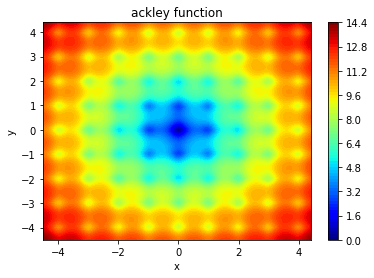

In [13]:
def ackley_function(x,y):
    elem1 = np.exp(-0.2*np.sqrt(0.5*(x**2+y**2)))
    elem2 = np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))
    return -20*elem1-elem2+20+np.e

def ackley_function_gradient(x,y):
    def elem1(a,b):
        return 2**(3/2)*a*np.exp(-0.2/np.sqrt(2)*np.sqrt(a**2+b**2)/np.sqrt(a**2+b**2))
    def elem2(a,b):
        return np.pi*np.sin(np.pi*2*a)*np.exp(0.5*(np.cos(np.pi*2*a)+np.cos(np.pi*2*b)))
    dx = elem1(x,y)+elem2(x,y)
    dy = elem1(y,x)+elem2(y,x)
    return(dx,dy)

plot_function(ackley_function)

### Eksperymenty sprwadzające działanie solvera dal różnych punktów początkowych oraz długości kroku

#### Punkt $(0.5,0.5)$

##### $\beta_t = 0.001$

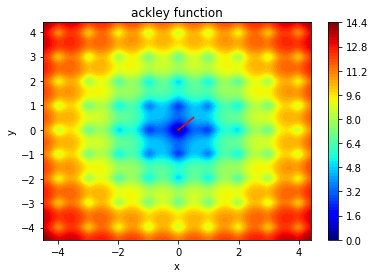

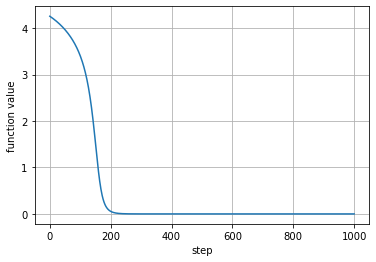

Step 996	 Current position (1.3023e-22	 1.3023e-22)	 value at position 4.4409e-16.
Step 997	 Current position (1.2292e-22	 1.2292e-22)	 value at position 4.4409e-16.
Step 998	 Current position (1.1602e-22	 1.1602e-22)	 value at position 4.4409e-16.
Step 999	 Current position (1.0951e-22	 1.0951e-22)	 value at position 4.4409e-16.
Step 1000	 Current position (1.0337e-22	 1.0337e-22)	 value at position 4.4409e-16.


In [14]:
start_position = (.5,.5)
beta = 0.001
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,1000,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.035$

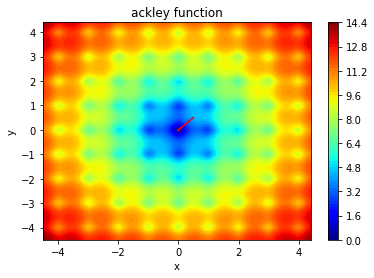

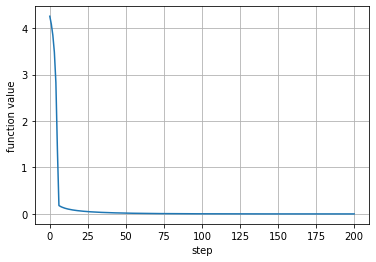

Step 196	 Current position (-1.8709e-05	 -1.8709e-05)	 value at position 7.4855e-05.
Step 197	 Current position (1.8034e-05	 1.8034e-05)	 value at position 7.2154e-05.
Step 198	 Current position (-1.7384e-05	 -1.7384e-05)	 value at position 6.9550e-05.
Step 199	 Current position (1.6756e-05	 1.6756e-05)	 value at position 6.7041e-05.
Step 200	 Current position (-1.6152e-05	 -1.6152e-05)	 value at position 6.4622e-05.


In [15]:
start_position = (0.5,0.5)
beta = 0.035
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,200,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.05$

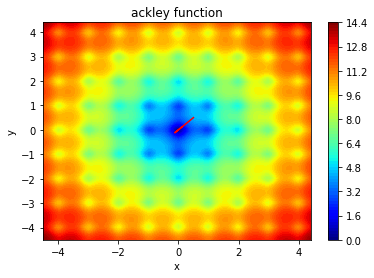

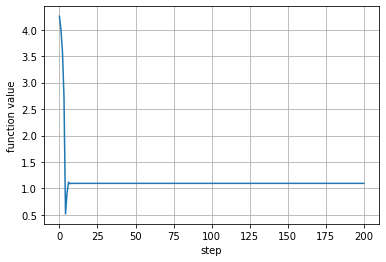

Step 196	 Current position (1.1821e-01	 1.1821e-01)	 value at position 1.0967e+00.
Step 197	 Current position (-1.1821e-01	 -1.1821e-01)	 value at position 1.0967e+00.
Step 198	 Current position (1.1821e-01	 1.1821e-01)	 value at position 1.0967e+00.
Step 199	 Current position (-1.1821e-01	 -1.1821e-01)	 value at position 1.0967e+00.
Step 200	 Current position (1.1821e-01	 1.1821e-01)	 value at position 1.0967e+00.


In [16]:
start_position = (0.5,0.5)
beta = 0.05
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,200,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

#### Punkt $(3.5,3)$

##### $\beta_t = 0.005$

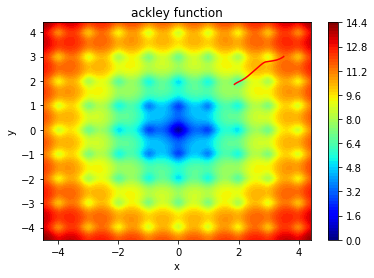

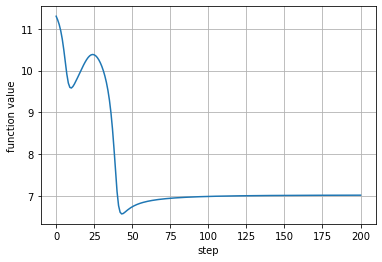

Step 196	 Current position (1.8629e+00	 1.8629e+00)	 value at position 7.0211e+00.
Step 197	 Current position (1.8629e+00	 1.8629e+00)	 value at position 7.0212e+00.
Step 198	 Current position (1.8629e+00	 1.8629e+00)	 value at position 7.0213e+00.
Step 199	 Current position (1.8629e+00	 1.8629e+00)	 value at position 7.0213e+00.
Step 200	 Current position (1.8629e+00	 1.8629e+00)	 value at position 7.0214e+00.


In [17]:
start_position = (3.5,3)
beta = 0.005
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,200,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.01$

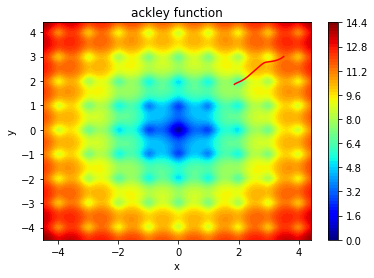

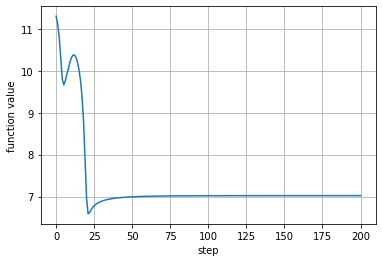

Step 196	 Current position (1.8626e+00	 1.8626e+00)	 value at position 7.0233e+00.
Step 197	 Current position (1.8626e+00	 1.8626e+00)	 value at position 7.0233e+00.
Step 198	 Current position (1.8626e+00	 1.8626e+00)	 value at position 7.0233e+00.
Step 199	 Current position (1.8626e+00	 1.8626e+00)	 value at position 7.0233e+00.
Step 200	 Current position (1.8626e+00	 1.8626e+00)	 value at position 7.0233e+00.


In [18]:
start_position = (3.5,3)
beta = 0.01
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,200,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.05$

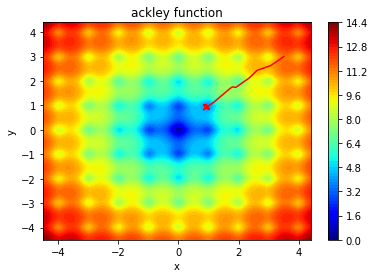

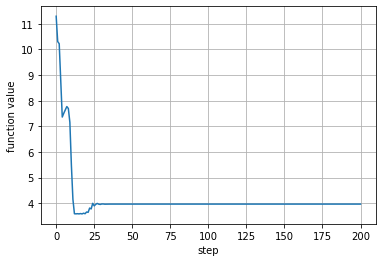

Step 196	 Current position (1.0240e+00	 8.4676e-01)	 value at position 3.9634e+00.
Step 197	 Current position (8.4676e-01	 1.0240e+00)	 value at position 3.9634e+00.
Step 198	 Current position (1.0240e+00	 8.4676e-01)	 value at position 3.9634e+00.
Step 199	 Current position (8.4676e-01	 1.0240e+00)	 value at position 3.9634e+00.
Step 200	 Current position (1.0240e+00	 8.4676e-01)	 value at position 3.9634e+00.


In [19]:
start_position = (3.5,3)
beta = 0.05
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,200,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

#### Punkt $(-4,4))$

##### $\beta_t = 0.001$

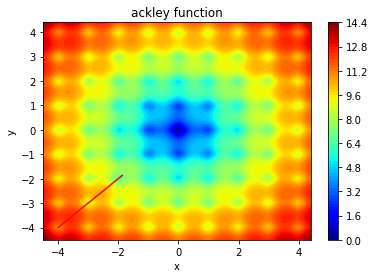

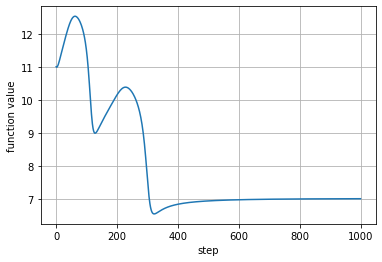

Step 996	 Current position (-1.8631e+00	 -1.8631e+00)	 value at position 7.0195e+00.
Step 997	 Current position (-1.8631e+00	 -1.8631e+00)	 value at position 7.0195e+00.
Step 998	 Current position (-1.8631e+00	 -1.8631e+00)	 value at position 7.0196e+00.
Step 999	 Current position (-1.8631e+00	 -1.8631e+00)	 value at position 7.0196e+00.
Step 1000	 Current position (-1.8631e+00	 -1.8631e+00)	 value at position 7.0196e+00.


In [20]:
start_position = (-4,-4)
beta = 0.001
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,1000,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.03$

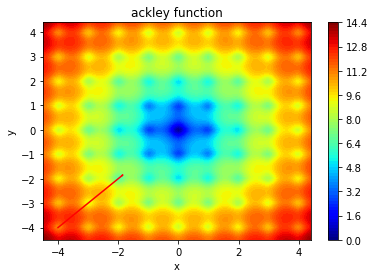

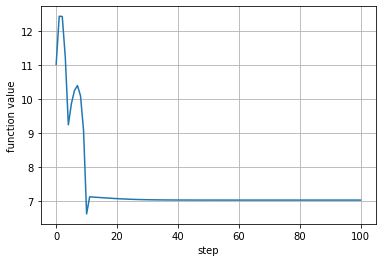

Step 96 	 Current position (-1.8625e+00	 -1.8625e+00)	 value at position 7.0233e+00.
Step 97 	 Current position (-1.8625e+00	 -1.8625e+00)	 value at position 7.0233e+00.
Step 98 	 Current position (-1.8625e+00	 -1.8625e+00)	 value at position 7.0233e+00.
Step 99 	 Current position (-1.8625e+00	 -1.8625e+00)	 value at position 7.0233e+00.
Step 100	 Current position (-1.8625e+00	 -1.8625e+00)	 value at position 7.0233e+00.


In [21]:
start_position = (-4,-4)
beta = 0.03
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,100,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

##### $\beta_t = 0.05$

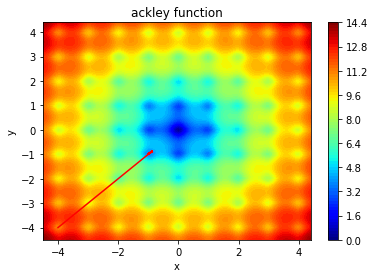

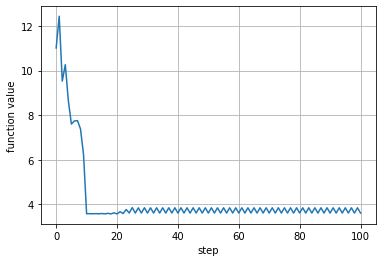

Step 96 	 Current position (-9.9611e-01	 -9.9611e-01)	 value at position 3.6134e+00.
Step 97 	 Current position (-8.8425e-01	 -8.8425e-01)	 value at position 3.8495e+00.
Step 98 	 Current position (-9.9611e-01	 -9.9611e-01)	 value at position 3.6134e+00.
Step 99 	 Current position (-8.8425e-01	 -8.8425e-01)	 value at position 3.8495e+00.
Step 100	 Current position (-9.9611e-01	 -9.9611e-01)	 value at position 3.6134e+00.


In [22]:
start_position = (-4,-4)
beta = 0.05
trace,values = gradient_descent(ackley_function,ackley_function_gradient,start_position,100,beta)

plot_function(ackley_function,trace)
plot_values(values)
print_values(trace[-5:],values[-5:])

### Wnioski 
Funkcja Ackleja w porównaniu z funkcją Himmelblau posiada łagodniejsze gradienty, przez co solver nie kończył pracy dążąc do nieskończoności a pozostawał w oscylacjach. Z drugiej strony funkcja posiada wiele minimów utrudiających lub całkiem uniemożliwiających dotarcie do jedynego minima lokalnego.
Ponownie, zgodnie z przewidywaniami ekstremalnie mała wartość $\beta_t$ potrzebuje najwięcej czasu by dotrzeć do minimum funkcji względem parametru przykładowego większego $\beta_t = 0.035$. Minimalizacja funkcji o większej wartości parametru np.$\beta_t = 0.05$, często kończyła się prezskoczeniem przez najbliższe minimum i dotarciem do innego. Przykłądowo dla punktu początkowego $(-4,4)$, mniejsze wartości parametru zwracały $(-1.863, -1.863)$, natomiast większy parametr przeskakiwał ten punkt i kończył prace oscylując nad lepszym punktem około $(-0.9961, -0.9961)$
Przyglądając się kilku ostatnim wartościom zwraanym przez solver można zauważyć, że dla tej funckji zbieganie do minimum przypomina gasnące oscylacje, aż zostanie wykonana odpowiednia liczba kroków.

## Podsumowanie Zadania
W trakcie zadania zaimplementowano algorytm mnimimalizujący funkcje metodą gradientu prostego. Obie funkcje na których należało testować przygotowany program posaiadły pułapki na algorytmy minimializujące w postaci wielu minimów lokalnych lub gradienty w punkcie które mogły doprowadzić algorytm do nieskończoności. W implementacji założono stałość podawanego przez użytkownika parametru $\beta_t$ oraz odgórnie podaną ilość kroków do wykonania. Oba rozwiązania okazjują się niepraktyczne w kontekście faktycznych zastosowań algorytmu i przed wprowadzeniem go do większego programu należałoby doprwacować dynamiczną zmianę długości kroku, najlepiej porównując z hesjanem funkcji. Dodatkowo możnaby uniknąć niepotrzebnego marnowania czasu jeśli solver osiągnął wymaganą dokładność rozwiązania przed wykonaniem wsystkich kroków. Pojawia się również problem niegasnąscych oscylacji, które mogłyby powodować zwracanie bezsensownego wyniku, jeśli nikt nie  zwróci na nie uwagi.